# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Emilio Cabrera

EID: EAC4622

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:

# Adaboost
Unlike a normal forest with a  predetermined depth size for the  trees, Adaboost starts by building a forest consisting of stumps instead of trees. Each stump is consequentially built from a previous stump’s errors and thus is different from a random forest where each tree is independent from another. Each step will try to account for the errors in the previous stump and so on and so forth. Hence the order is important, as the errors influence each consequential tree/stump. Multiple stumps are built until a specified number of stumps OR a perfect fit is reached. Some stumps are weighted differently in the final classification/output. 
# Gradient Boosting
Similarly GB starts off with an average value for a given parameter and then progressively constructs a tree based on the errors of the previous tree. The trees are scaled with a learning rate and in the case of a classification probem, log odds are scaled utilizing a derivation of probability p.
# Key differences 
GB has three main compnonetns; additive model, loss function and a weak learner. GB utilizes various different loss functions and in the case of Adaboosting it utilizes the exponential loss function making it more sensitive to outliers. This makes GB a little more flexible as it can utilize various loss functions instead of being restricted to one. Adaboosting is mainly desinged for classification problems and can really boost performance when dealing with decison trees. In Adaboost additive models, the shifting is done by upweighting previous missclaffiefied observations where as in GB identifies high residual computed from the past. 



# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [2]:
def plot_model(X, y, svc, kernel='linear',gamma=0.5):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = (x0_max / x0_min)/100
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    plt.subplot(1, 1, 1)
    y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
    y_pred = y_pred.reshape(xx0.shape)
    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.xlim(xx0.min(), xx0.max())
    plt.title('SVC with {} kernel with {} gamma'.format(kernel,gamma))
    plt.show()

In [3]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma)
    svc.fit(X,y)
    return svc

## A

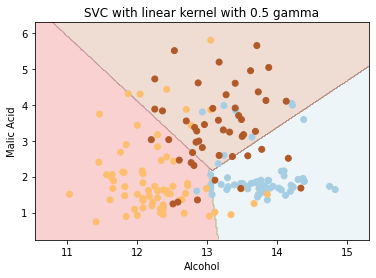

In [4]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## B

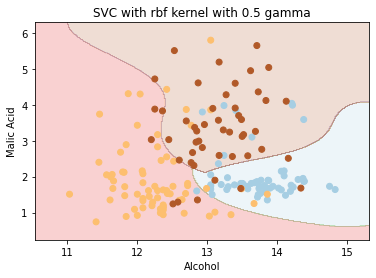

In [5]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf',gamma=0.5)

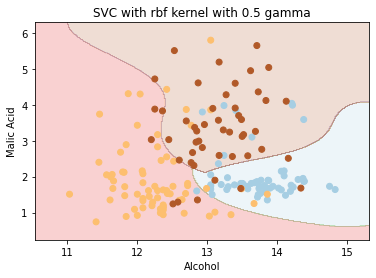

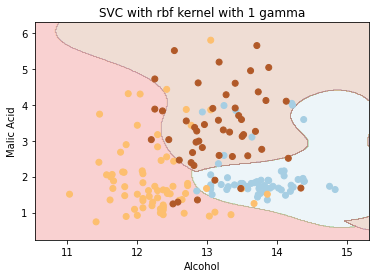

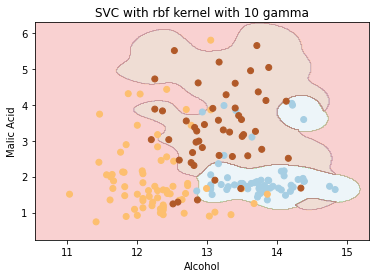

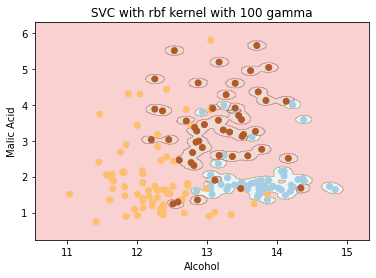

In [6]:
gamma = [0.5, 1, 10, 100]
for i in gamma:
    svc = train_model(X, y, kernel='rbf', C=1, gamma=i)
    plot_model(X, y, svc, kernel='rbf',gamma=i)

- As gamma increases the classification area becomes more refined/decreases in size.
- Despite such an improvement in accuracy, this may lead to overfitting a model when selecting a higher level gamma value. 

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score


data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## A

In [8]:
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)[:, 1]
print("Decision Tree Accuracy score:",accuracy_score(y_test, y_pred1))
print("Decision Tree ROC AUC score:",roc_auc_score(y_test, y_pred2))

Decision Tree Accuracy score: 0.9098090849242922
Decision Tree ROC AUC score: 0.9040453749567611


In [9]:
clf = LogisticRegression(random_state=10,
                         solver="newton-cg")
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)[:, 1]
print("Logistic Regression Accuracy score:",accuracy_score(y_test, y_pred1))
print("Logistic Regression ROC AUC score:",roc_auc_score(y_test, y_pred2))

Logistic Regression Accuracy score: 0.9315339038841343
Logistic Regression ROC AUC score: 0.9734682742610166


## B

In [10]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                        n_estimators=50,
                        random_state=10)
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)[:, 1]
print("Decision Tree with Bagging Accuracy score:",accuracy_score(y_test, y_pred1))
print("Decision Tree with Bagging ROC AUC score:",roc_auc_score(y_test, y_pred2))

Decision Tree with Bagging Accuracy score: 0.9368005266622779
Decision Tree with Bagging ROC AUC score: 0.9796839729119637


In [11]:
clf = BaggingClassifier(base_estimator=LogisticRegression(random_state=10,
                        solver="newton-cg"),
                        n_estimators=50,
                        random_state=10)
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)[:, 1]
print("Logistic Regression with Bagging Accuracy score:",accuracy_score(y_test, y_pred1))
print("Logistic Regression with Bagging ROC AUC score:",roc_auc_score(y_test, y_pred2))

Logistic Regression with Bagging Accuracy score: 0.934167215273206
Logistic Regression with Bagging ROC AUC score: 0.97552769248874


Decision Trees: Baggining imporoved the accuracy by 2.7% and the ROC/AUC by 7.5%

Logistic Regression: Bagging didnt show much signs of improvement for this regression model's accuracy or ROC/AUC

## C

In [12]:
clf = RandomForestClassifier()
param_grid = {"n_estimators": [10, 100, 500], 
              "criterion": ['gini', 'entropy'], 
              "random_state": [42]}
cv_clf = GridSearchCV(estimator=clf,param_grid=param_grid)
cv_clf.fit(X_train,y_train)
y_pred1 = cv_clf.predict(X_test)
y_pred2 = cv_clf.predict_proba(X_test)[:, 1]
print("Random Forest Accuracy score:",accuracy_score(y_test, y_pred1))
print("Random Forest ROC AUC score:",roc_auc_score(y_test, y_pred2))

Random Forest Accuracy score: 0.9552337063857801
Random Forest ROC AUC score: 0.9891234188838844


In [13]:
cv_clf.best_params_

{'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}

## D

In [ ]:
clf = GradientBoostingClassifier()

param_grid = {"n_estimators":[10, 100, 500],
              "learning_rate":[0.01, 0.1, 0.5], 
              "max_depth":[3, 5, 10], 
              "subsample":[0.5, 0.7, 1.0], 
              "random_state":[42]}

cv_clf = GridSearchCV(estimator=clf,param_grid=param_grid)
cv_clf.fit(X_train,y_train)
y_pred1 = cv_clf.predict(X_test)
y_pred2 = cv_clf.predict_proba(X_test)[:, 1]
print("Gradient Boosting Accuracy score:",accuracy_score(y_test, y_pred1))
print("Gradient Boosting ROC AUC score:",roc_auc_score(y_test, y_pred2))

In [ ]:
cv_clf.best_params_

In [ ]:
clf = AdaBoostClassifier()

param_grid = {"n_estimators":[10, 100, 500], 
              "learning_rate":[0.01, 0.1, 0.5], 
              "random_state":[42]}

cv_clf = GridSearchCV(estimator=clf,param_grid=param_grid)
cv_clf.fit(X_train,y_train)
y_pred1 = cv_clf.predict(X_test)
y_pred2 = cv_clf.predict_proba(X_test)[:, 1]
print("Ada Boosting Acc score:",accuracy_score(y_test, y_pred1))
print("Ada Boosting ROC AUC score:",roc_auc_score(y_test, y_pred2))

In [ ]:
cv_clf.best_params_

## E

In [ ]:
rf_acc = []
rf_roc = []
gb_acc = []
gb_roc = []
ab_acc = []
ab_roc = []

rf_crit = 'gini'
gb_lr = 0.1
gb_max_depth = 3
gb_subsample = 1.0
ab_lr = 0.1

n_estimators = [10, 100, 500]

for i in n_estimators:
    clf = RandomForestClassifier()
    param_grid = {"n_estimators": [i], "criterion": [rf_crit], "random_state": [42]}
    cv_clf = GridSearchCV(estimator=clf,param_grid=param_grid)
    cv_clf.fit(X_train,y_train)
    y_pred1 = cv_clf.predict(X_test)
    y_pred2 = cv_clf.predict_proba(X_test)[:, 1]
    rf_acc.append(accuracy_score(y_test, y_pred1))
    rf_roc.append(roc_auc_score(y_test, y_pred2))

for i in n_estimators:
    clf = GradientBoostingClassifier()
    param_grid = {"n_estimators":[i], "learning_rate":[gb_lr], "max_depth":[gb_max_depth], "subsample":[gb_subsample], "random_state":[42]}
    cv_clf = GridSearchCV(estimator=clf,param_grid=param_grid)
    cv_clf.fit(X_train,y_train)
    y_pred1 = cv_clf.predict(X_test)
    y_pred2 = cv_clf.predict_proba(X_test)[:, 1]
    gb_acc.append(accuracy_score(y_test, y_pred1))
    gb_roc.append(roc_auc_score(y_test, y_pred2))
    
for i in n_estimators:
    clf = AdaBoostClassifier()
    param_grid = {"n_estimators":[i], "learning_rate":[ab_lr], "random_state":[42]}
    cv_clf = GridSearchCV(estimator=clf,param_grid=param_grid)
    cv_clf.fit(X_train,y_train)
    y_pred1 = cv_clf.predict(X_test)
    y_pred2 = cv_clf.predict_proba(X_test)[:, 1]
    ab_acc.append(accuracy_score(y_test, y_pred1))
    ab_roc.append(roc_auc_score(y_test, y_pred2))

In [ ]:
plt.plot(n_estimators,rf_acc,label="RF",marker='o')
plt.plot(n_estimators,gb_acc,label="GB",marker='o')
plt.plot(n_estimators,ab_acc,label="AB",marker='o')
plt.title("Accuracy vs Estimator Number for Different Classifiers")
plt.xlabel("n_estimators")
plt.ylabel("Classifier Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(n_estimators,rf_roc,label="RF",marker='o')
plt.plot(n_estimators,gb_roc,label="GB",marker='o')
plt.plot(n_estimators,ab_roc,label="AB",marker='o')
plt.title("ROC/AUC vs Estimator Number for Different Classifiers")
plt.xlabel("n_estimators")
plt.ylabel("Classifier ROC/AUC")
plt.legend()
plt.show()

In [ ]:
data = {"RF acc":rf_acc,
       "GB acc":gb_acc,
       "AB acc":gb_acc,
       "RF roc":rf_roc,
       "GB roc":gb_roc,
       "AB roc":gb_roc}
df = pd.DataFrame(data=data,index=n_estimators)
df.index.name = "n_estimators"
df